In [165]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [166]:
df1= pd.read_csv(r"C:\Users\danie\Desktop\Dan\Career Foundry\Achievement Six\Netflix Movies and Shows\imdb_movies_shows (TRIAL).csv2nd_prep_data.csv")

In [167]:
#create a subset 
sub2 = df1[['release_year', 'imdb_votes']]

In [168]:
sub2.head()

,release_year,imdb_votes
0,1969,72895.0
1,1989,302700.0
2,1982,33760.0
3,1984,4948.0
4,1989,34854.0


In [169]:
sub2.shape

(1637, 2)

In [170]:
sub2.columns

Index(['release_year', 'imdb_votes'], dtype='object')

In [171]:
type(sub2)

pandas.core.frame.DataFrame

In [172]:
sub2.set_index('release_year', inplace=True)

In [173]:
release_year = [1969, 1982, 1984, 1989, 1989]
imdb_votes = [72895, 33760, 4984, 302700, 34854]

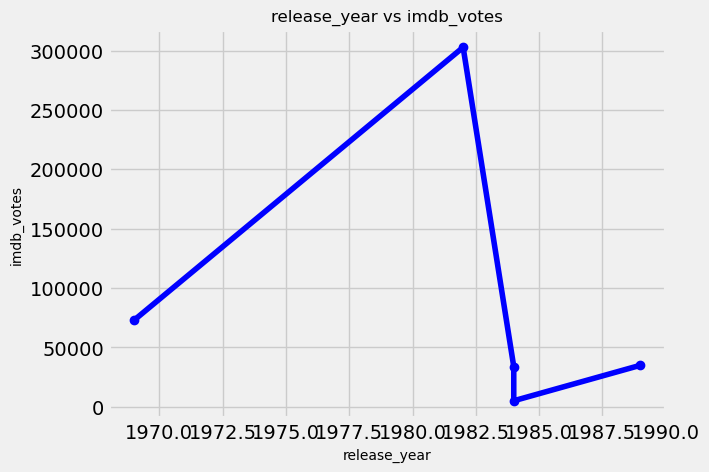

<Figure size 5000x3000 with 0 Axes>

In [174]:
release_year = [1969, 1982, 1984, 1984, 1989]
imdb_votes = [72895, 302700, 33760, 4984, 34854]

plt.plot(release_year, imdb_votes, color='blue', marker='o')
plt.title('release_year vs imdb_votes', fontsize=12)
plt.xlabel('release_year', fontsize=10)
plt.ylabel('imdb_votes', fontsize=10)
plt.grid(True)
plt.figure(figsize=(25,15), dpi=200)
plt.show()

The release year is the only time sensitive data in the df. The imdb_votes is my primary variable. 

In [197]:
# Reset index so that you can use the "release_year" column as a filter

df2 = sub2.reset_index()

In [198]:
df2.head()

,index,release_year,imdb_votes
0,0,1969,72895.0
1,1,1989,302700.0
2,2,1982,33760.0
3,3,1984,4948.0
4,4,1989,34854.0


In [199]:
df2.shape

(1637, 3)

In [200]:
data_sub = df2.loc[(df2['release_year'] > '1969') & (df2['release_year'] < '2020')]

TypeError: Invalid comparison between dtype=int64 and str

4. TESTING FOR STATIONARY

In [189]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function 


def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub2['release_year'])

Dickey-Fuller Stationarity test:
Test Statistic                -8.606794e+00
p-value                        6.638943e-14
Number of Lags Used            2.400000e+01
Number of Observations Used    1.612000e+03
Critical Value (1%)           -3.434413e+00
Critical Value (5%)           -2.863335e+00
Critical Value (10%)          -2.567725e+00
dtype: float64


ValueError: x is required to have ndim 1 but has ndim 2

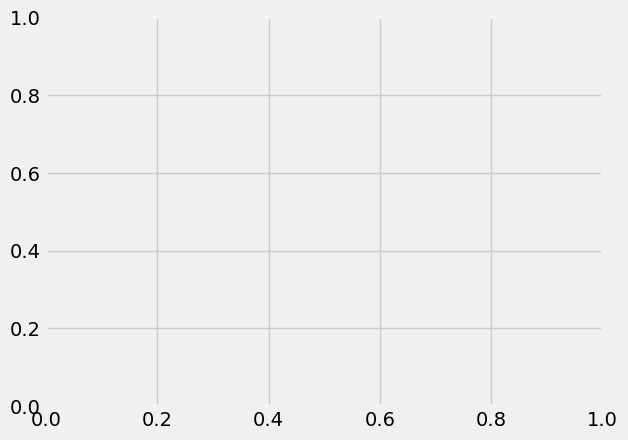

In [193]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(sub2)
plt.show()

Stationarizing the Data

In [182]:
data_diff = sub2 - sub2.shift(1)

In [183]:
data_diff.dropna(inplace=True)

In [184]:
data_diff.head()

,release_year,imdb_votes
1,20.0,229805.0
2,-7.0,-268940.0
3,2.0,-28812.0
4,5.0,29906.0
5,-6.0,-31728.0


In [185]:
data_diff.columns

Index(['release_year', 'imdb_votes'], dtype='object')

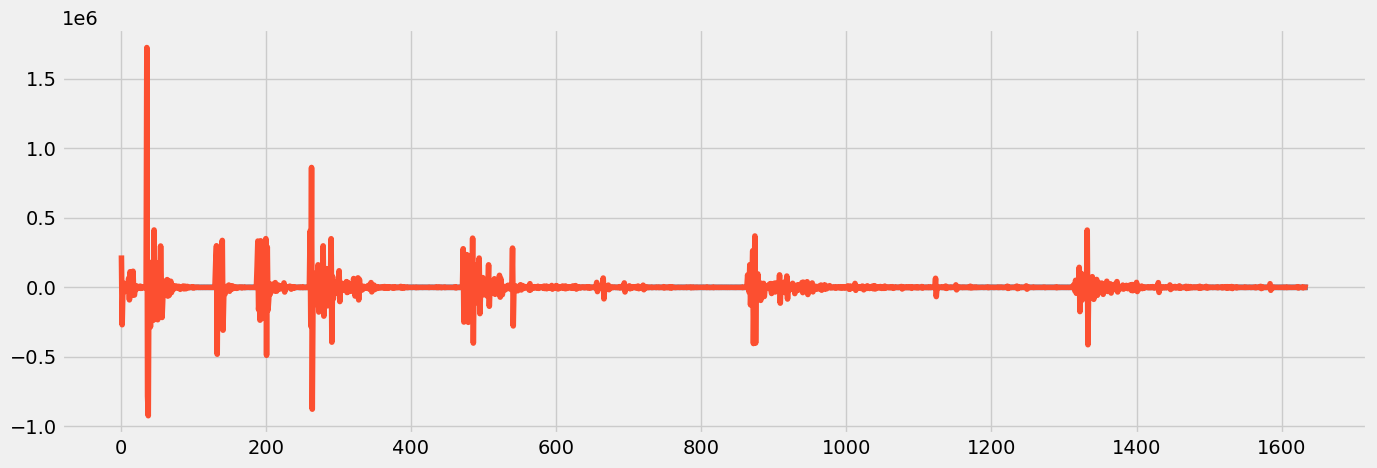

In [186]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [187]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub2['release_year'])

Dickey-Fuller Stationarity test:
Test Statistic                -8.606794e+00
p-value                        6.638943e-14
Number of Lags Used            2.400000e+01
Number of Observations Used    1.612000e+03
Critical Value (1%)           -3.434413e+00
Critical Value (5%)           -2.863335e+00
Critical Value (10%)          -2.567725e+00
dtype: float64
